In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

C:\Users\user\anaconda3\lib\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


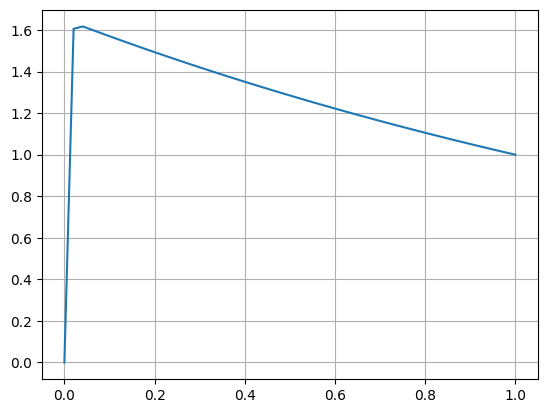

In [2]:
def myode(z, Y, ep):
    T, Tp = Y
    Tpp = -1/ep*(2*Tp + T)
    return [Tp, Tpp]

def myF(a):
    Y0 = [0, a]
    ep = 0.01
    fwd = lambda z, Y: myode(z, Y, ep)
    sol = solve_ivp(fwd, [0, 1], Y0, dense_output=True)
    
    # Value at the right endpoint
    T1 = sol.y[0,-1]
    F = T1 - 1
    return F

sol = root(myF, 1)
asol = sol.x[0]

ep = 0.01
fwd = lambda z, Y: myode(z, Y, ep)
sol = solve_ivp(fwd, [0, 1], [0, asol], dense_output=True)
t = np.linspace(0, 1, 50)
Y = sol.sol(t)
plt.plot(t, Y[0])
plt.grid(True)

In [3]:
asol

328.50498655968454